In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
ev = pd.read_csv("../Project 1/alt_fuel_stations.csv")
sales=pd.read_csv("../Project 1/Car_Sales.csv")


ev_by_state = ev[['ID','State','EV Level2 EVSE Num','EV DC Fast Count','EV Network','Open Date','Facility Type','EV Pricing']]
ev_by_state
ev_state=ev_by_state.rename(columns={'EV Level2 EVSE Num':'Medium_Charger',
                           'EV DC Fast Count':'Super_Charger',
                           'EV Network':'Charger_Types',
                           'Open Date':'Date',
                           'Facility Type':'Facility_type',
                           'EV Pricing':'Charging_rate'})

ev_state ["Date"]=pd.to_datetime(ev_state["Date"]).dt.year
ev_state.head()






,ID,State,Medium_Charger,Super_Charger,Charger_Types,Date,Facility_type,Charging_rate
0,UN,CA,NaN,NaN,Unknown,2018,PAY_GARAGE,NaN
1,UN,CA,1.0,NaN,Unknown,2015,HOTEL,NaN
2,UN,CA,6.0,NaN,Unknown,2017,PARKING_GARAGE,$1 per hour for first two hours; $3 per hour t...
3,UN,CA,3.0,NaN,Unknown,2016,MUNI_GOV,Free
4,UN,WA,NaN,NaN,Unknown,2018,MUNI_GOV,NaN


In [40]:
ev

,ID,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Groups With Access Code,Access Days Time,...,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source
0,UN,ELEC,City of Sacramento - Capitol Parking Garage,1015 L St,"At 10th and L, 2nd Level",Sacramento,CA,95814,Public,Garage business hours; pay lot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UN,ELEC,Hilton - Los Angeles International Airport,5711 W Century Blvd,NaN,Los Angeles,CA,90045,Public,24 hours daily; for guest use only; see valet ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UN,ELEC,Helms Bakery Building,8800 Venice Blvd,NaN,Los Angeles,CA,90034,Public,24 hours daily,...,$1 per hour for first two hours; $3 per hour t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UN,ELEC,Citrus Heights City Hall,6360 Fountain Square Dr,NaN,Citrus Heights,CA,95621,Public,24 hours daily,...,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UN,ELEC,City of Lacey - City Hall Parking,420 College St,"At 3rd Ave SE, next to police station",Lacey,WA,98503,Public,24 hours daily,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,UN,ELEC,Discovery Center of Idaho,131 W Myrtle St,NaN,Boise,ID,83702,Public,24 hours daily,...,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,UN,ELEC,Alan Jay Nissan,1700 Flare Rd,NaN,Sebring,FL,33870,Public - Call ahead,Dealership business hours,...,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,UN,ELEC,Younger Nissan,7418 Grove Rd,NaN,Frederick,MD,21704,Public - Call ahead,Dealership business hours,...,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,UN,ELEC,Colonial Honda of Dartmouth,225 State Rd,NaN,North Dartmouth,MA,2747,Public - Call ahead,Dealership business hours,...,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,UN,ELEC,AAA Car Care Plus,8120 Main St,NaN,Clarence,NY,14221,Public,24 hours daily,...,Free,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
ev_state.groupby('Date')['Medium_Charger','Super_Charger'].count().reset_index()



,Date,Medium_Charger,Super_Charger
0,2015,1203,149
1,2016,1429,125
2,2017,1194,94
3,2018,1475,249


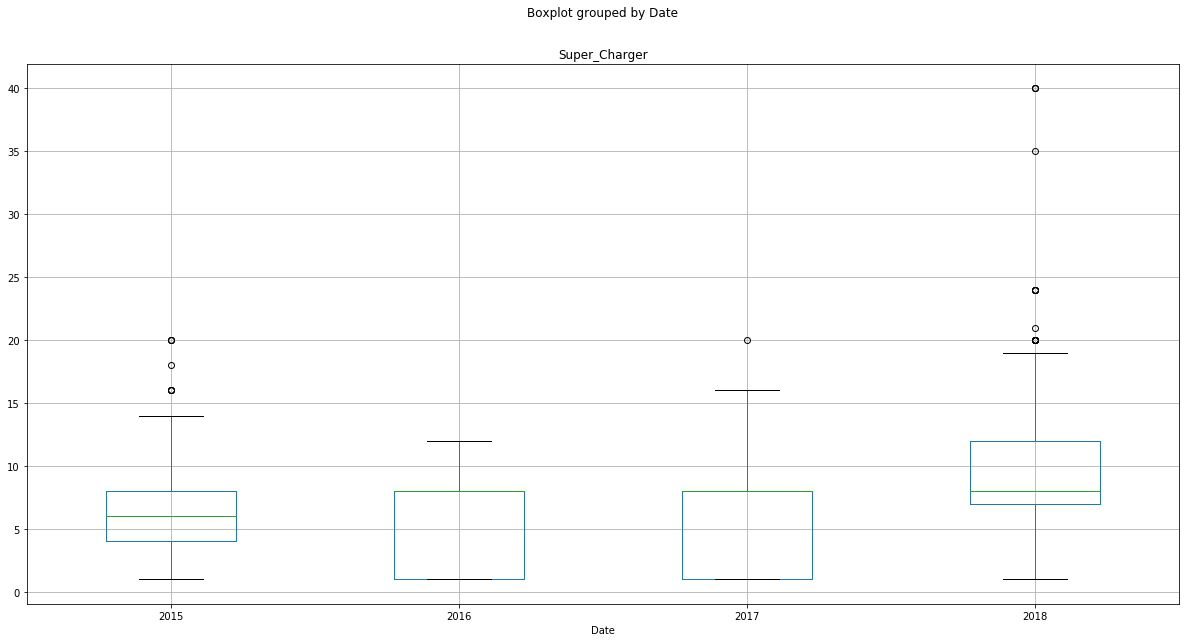

In [35]:
# Create a boxplot to compare means
ev_state.boxplot("Super_Charger", by="Date", figsize=(20, 10))
plt.savefig("Grouped by Super Charger.png")

In [9]:
ev_s=ev_state[[ "ID","Date","Facility_type"]]
ev_s.groupby([ "ID", "Date" ]).count()



5528

In [25]:
ev_state.groupby('ID')['Facility_type'].count()


ID
O      200
T     3364
UN    1964
Name: Facility_type, dtype: int64

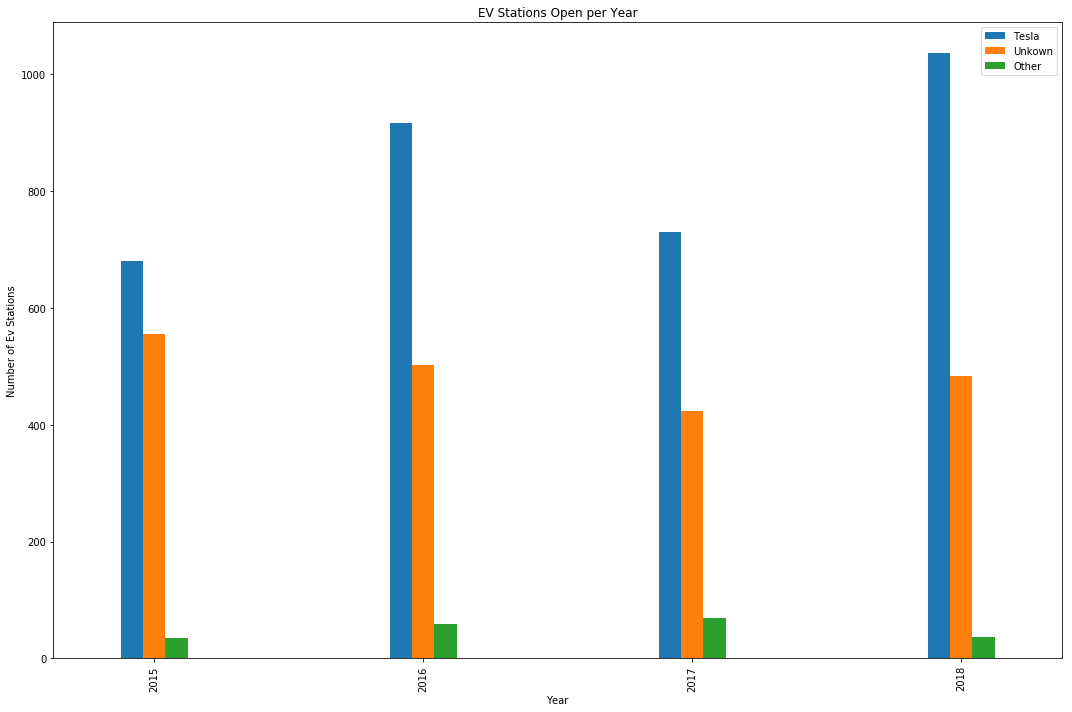

<Figure size 1080x720 with 0 Axes>

In [37]:
n_groups = 5

Tesla:[680,917, 730, 1037]
Other : [35, 59, 69, 37]
Unkown :[555,502,423,484]


m1_t = pd.DataFrame({
                 'Tesla':[680,917, 730, 1037],
                 'Unkown' :[555,502,423,484],
                 'Other' : [35, 59, 69, 37]})

m1_t[['Tesla','Unkown','Other' ]].plot(kind='bar', width = .25)


ax = plt.gca()
ax.set_xticklabels(('2015', '2016', '2017', '2018'))
plt.title('EV Stations Open per Year')
plt.xlabel('Year')
plt.ylabel('Number of Ev Stations')
plt.tight_layout()
plt.show()
plt.savefig("EV Stations Open per Year.png")

In [12]:
ev_state.groupby('Charger_Types')['Medium_Charger','Super_Charger'].count()

,Medium_Charger,Super_Charger
Charger_Types,,
ChargePoint Network,5,2
EV Connect,149,4
Greenlots,2,2
OpConnect,35,5
Tesla,0,443
Tesla Destination,3316,0
Unknown,1794,159
eVgo Network,0,2


In [31]:
ev_state('Medium_Charger').sum()

TypeError: 'DataFrame' object is not callable

In [13]:
group=ev_state.groupby('State').Medium_Charger.count().nlargest(5)
group

State
CA    943
NY    463
FL    319
TX    260
VA    242
Name: Medium_Charger, dtype: int64

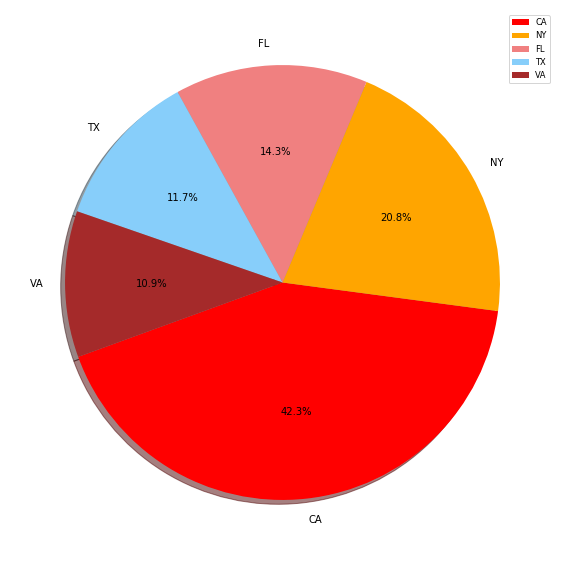

In [39]:
# Labels for the sections of our pie chart
labels = ['CA','NY','FL','TX','VA']

# The values of each section of the pie chart
sizes = [943,463,319,260,242]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "brown"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)

plt.legend(loc="best", fontsize="small")

plt.savefig("Top 5 States.png")

In [11]:
Charger_Data=ev_state.groupby(['Charger_Types']).Medium_Charger.count()
Charger_Data.sort_values(ascending=False)


Charger_Types
Tesla Destination      3316
Unknown                1794
EV Connect              149
OpConnect                35
ChargePoint Network       5
Greenlots                 2
eVgo Network              0
Tesla                     0
Name: Medium_Charger, dtype: int64

In [14]:
Charger_data = {'Charger_Types': ['Tesla Destination', 'Unknown', 'EV Connect', 'OpConnect', 'ChargePoint Network', 'Greenlots'],
        'Total': [3316, 1794,149,35,5,2]}
    
        
df = pd.DataFrame(Charger_data, columns = ['Charger_Types', 'Total'])
df


,Charger_Types,Total
0,Tesla Destination,3316
1,Unknown,1794
2,EV Connect,149
3,OpConnect,35
4,ChargePoint Network,5
5,Greenlots,2


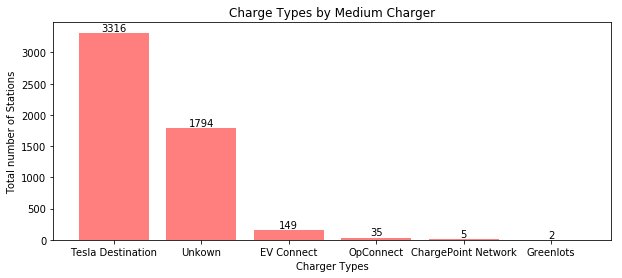

In [40]:
plt.figure(figsize=(10,4))
Total = [3316, 1794,149,35,5,2]
x_axis = np.arange(len(Total))
bar_chart=plt.bar(x_axis, Total, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Tesla Destination", "Unkown", "EV Connect", "OpConnect", "ChargePoint Network","Greenlots"])
plt.title("Charge Types by Medium Charger")
plt.xlabel("Charger Types")
plt.ylabel("Total number of Stations")

for bar in bar_chart:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.savefig("Charger Types by EV2 level Charger.png")

In [8]:
 ev_state.groupby('Date')['Medium_Charger'].count()


Date
2015    1203
2016    1429
2017    1194
2018    1475
Name: Medium_Charger, dtype: int64

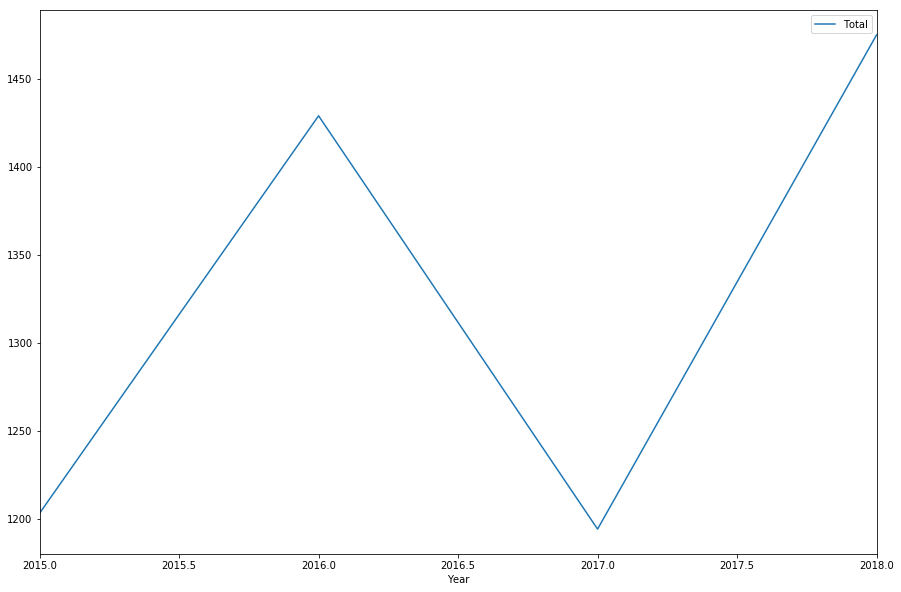

In [41]:
year_data_stations=pd.DataFrame({'Year':[2015,2016,2017,2018],
                                'Total':[1203,1429,1194,1475]})

plt.rcParams['figure.figsize'] = [15, 10]
year_data_stations.plot(x = "Year", y = "Total", fontsize = 10)
plt.xlabel('Year', fontsize = 10)
plt.savefig("EV Car Sale per Year.png")

In [17]:
sales.head()

,ID,Vehicle,Type,Date,sale_volume
0,O,BMW i3,EV,2015,11004
1,O,Chevrolet Bolt,EV,2015,0
2,O,Chevrolet Spark,EV,2015,2629
3,O,Fiat 500E,EV,2015,3477
4,O,Ford Focus EV,EV,2015,1582


In [18]:
 sales.groupby('Date').sum()['sale_volume']

Date
2015     71024
2016     82731
2017    104171
2018    238878
Name: sale_volume, dtype: int64

In [19]:
 sales['sale_volume'][ sales['ID'] == 'T'].sum()

313960

In [20]:
car_sales_T=sales.groupby('ID')['sale_volume'].sum()
(100. *car_sales_T/ car_sales_T.sum()).round(0)

ID
O    37.0
T    63.0
Name: sale_volume, dtype: float64

In [34]:
car_station=pd.DataFrame({'Year':[2015,2016,2017,2018],
                                'Station_Total':[1203,1429,1194,1475],
                                 'Car_Total':[71024,82731,104171,238878]})
car_station.drop


<bound method DataFrame.drop of    Year  Station_Total  Car_Total
0  2015           1203      71024
1  2016           1429      82731
2  2017           1194     104171
3  2018           1475     238878>

In [33]:
((car_station['Station_Total']/car_station['Car_Total'])*100).round(1).astype(str) + '%'


0    1.7%
1    1.7%
2    1.1%
3    0.6%
dtype: object

In [23]:
ar_station=pd.DataFrame({'Station_Total':[1203,1429,1194,1475],
                         'Car_Total':[71024,82731,104171,238878]})
ar_station
(100. *ar_station/ ar_station.sum()).round(0)


,Station_Total,Car_Total
0,23.0,14.0
1,27.0,17.0
2,23.0,21.0
3,28.0,48.0


In [44]:
car_station=pd.DataFrame({'Year':[2015,2016,2017,2018],
                                'Station_Total':[23,27,23,28],
                                 'Car_Total':[14,17,21,48]})
car_station

,Year,Station_Total,Car_Total
0,2015,23,14
1,2016,27,17
2,2017,23,21
3,2018,28,48


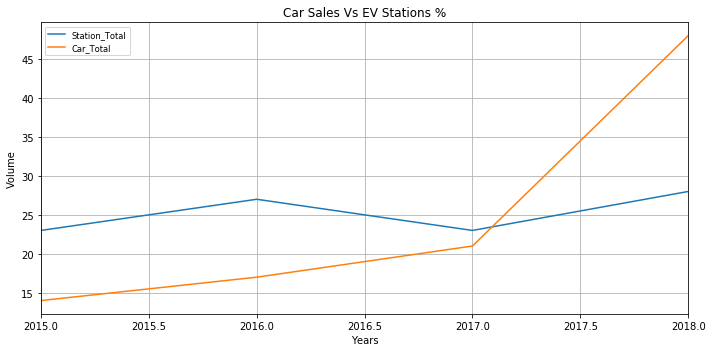

In [45]:
car_station.plot(x='Year', y=['Station_Total', 'Car_Total'], figsize=(10,5), grid=True)


plt.title("Car Sales Vs EV Stations %")
plt.xlabel("Years")
plt.ylabel("Volume")
plt.tight_layout()
plt.grid(True)
plt.legend(loc="best", fontsize="small")
plt.savefig("Car Sales Vs EV Stations BY %.png")

